In [97]:
import pandas as pd

In [98]:
file = pd.read_csv("stepDetector_30min.csv")

In [99]:
file.head()

,Unnamed: 0,experimentid,userid,day,rounded_timestamp,step_count
0,0,wenetItaly,0,20201114,2020-11-14 08:30:00,39
1,1,wenetItaly,0,20201114,2020-11-14 12:00:00,148
2,2,wenetItaly,0,20201115,2020-11-15 09:30:00,5
3,3,wenetItaly,0,20201117,2020-11-17 12:00:00,81
4,4,wenetItaly,0,20201117,2020-11-17 16:30:00,13


In [102]:
file = file.drop("Unnamed: 0", axis=1)
file = file.drop("experimentid", axis=1)
file

,userid,day,rounded_timestamp,step_count
0,0,20201114,2020-11-14 08:30:00,39
1,0,20201114,2020-11-14 12:00:00,148
2,0,20201115,2020-11-15 09:30:00,5
3,0,20201117,2020-11-17 12:00:00,81
4,0,20201117,2020-11-17 16:30:00,13
...,...,...,...,...
22582,265,20201123,2020-11-23 20:30:00,177
22583,265,20201124,2020-11-24 15:30:00,15
22584,265,20201124,2020-11-24 16:30:00,30
22585,265,20201124,2020-11-24 19:00:00,142


In [103]:
import pandas as pd

df = file.copy()

daily_step_counts = df.groupby(['userid', 'day'])['step_count'].sum().reset_index()

media_passi_giornalieri = daily_step_counts['step_count'].mean()
mediana_passi_giornalieri = daily_step_counts['step_count'].median()

print(mediana_passi_giornalieri)
print(media_passi_giornalieri)


df = pd.merge(df, daily_step_counts.groupby('userid')['step_count'].sum().reset_index().rename(columns={'step_count': 'totale_passi_giornalieri'}), on='userid')

df['stato_utente'] = pd.qcut(df['totale_passi_giornalieri'], q=[0, 1/7.5, 2/3, 1], labels=['Poco Attivo','Attivo', 'Molto Attivo'])


print(df)

555.5
1576.3199174406604
       userid       day    rounded_timestamp  step_count  \
0           0  20201114  2020-11-14 08:30:00          39   
1           0  20201114  2020-11-14 12:00:00         148   
2           0  20201115  2020-11-15 09:30:00           5   
3           0  20201117  2020-11-17 12:00:00          81   
4           0  20201117  2020-11-17 16:30:00          13   
...       ...       ...                  ...         ...   
22582     265  20201123  2020-11-23 20:30:00         177   
22583     265  20201124  2020-11-24 15:30:00          15   
22584     265  20201124  2020-11-24 16:30:00          30   
22585     265  20201124  2020-11-24 19:00:00         142   
22586     265  20201124  2020-11-24 21:00:00          42   

       totale_passi_giornalieri stato_utente  
0                           872  Poco Attivo  
1                           872  Poco Attivo  
2                           872  Poco Attivo  
3                           872  Poco Attivo  
4                  

In [105]:
utenti_stato_dict = dict(zip(df['userid'], df['stato_utente']))

In [106]:
utenti_stato_dict

{0: 'Poco Attivo',
 2: 'Attivo',
 3: 'Poco Attivo',
 8: 'Molto Attivo',
 10: 'Poco Attivo',
 17: 'Poco Attivo',
 18: 'Attivo',
 19: 'Molto Attivo',
 20: 'Attivo',
 22: 'Poco Attivo',
 23: 'Attivo',
 25: 'Poco Attivo',
 26: 'Attivo',
 27: 'Molto Attivo',
 29: 'Poco Attivo',
 32: 'Attivo',
 35: 'Poco Attivo',
 37: 'Poco Attivo',
 41: 'Attivo',
 42: 'Molto Attivo',
 43: 'Attivo',
 45: 'Attivo',
 46: 'Poco Attivo',
 48: 'Attivo',
 58: 'Molto Attivo',
 60: 'Molto Attivo',
 62: 'Poco Attivo',
 63: 'Poco Attivo',
 65: 'Poco Attivo',
 66: 'Poco Attivo',
 67: 'Poco Attivo',
 70: 'Poco Attivo',
 71: 'Poco Attivo',
 72: 'Poco Attivo',
 74: 'Molto Attivo',
 75: 'Attivo',
 77: 'Poco Attivo',
 80: 'Attivo',
 82: 'Poco Attivo',
 83: 'Poco Attivo',
 85: 'Poco Attivo',
 86: 'Poco Attivo',
 88: 'Poco Attivo',
 91: 'Attivo',
 93: 'Poco Attivo',
 95: 'Poco Attivo',
 96: 'Attivo',
 97: 'Attivo',
 100: 'Molto Attivo',
 103: 'Attivo',
 105: 'Molto Attivo',
 106: 'Poco Attivo',
 107: 'Molto Attivo',
 109: 'Mo

In [107]:
clusters = pd.read_csv("clusters.csv")

In [108]:
clusters = clusters.drop("Unnamed: 0", axis=1)
clusters


,userid,cluster
0,0,3
1,1,2
2,10,3
3,100,3
4,101,3
...,...,...
244,95,2
245,96,3
246,97,3
247,98,0


In [109]:
dizionario = utenti_stato_dict.copy()
df_tabella = clusters.copy()

df_dizionario = pd.DataFrame(list(dizionario.items()), columns=['userid', 'stato_utente'])

df_finale = pd.merge(df_tabella, df_dizionario, on='userid', how='left')

In [110]:
df_finale

,userid,cluster,stato_utente
0,0,3,Poco Attivo
1,1,2,NaN
2,10,3,Poco Attivo
3,100,3,Molto Attivo
4,101,3,NaN
...,...,...,...
244,95,2,Poco Attivo
245,96,3,Attivo
246,97,3,Attivo
247,98,0,NaN


In [111]:
df_finale = df_finale.dropna()

In [112]:
df_finale

,userid,cluster,stato_utente
0,0,3,Poco Attivo
2,10,3,Poco Attivo
3,100,3,Molto Attivo
6,103,0,Attivo
8,105,0,Molto Attivo
...,...,...,...
240,91,0,Attivo
242,93,2,Poco Attivo
244,95,2,Poco Attivo
245,96,3,Attivo


In [146]:
df_finale['stato_utente'] = df_finale['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])
tabella_contingenza = pd.crosstab(df_finale['cluster'], df_finale['stato_utente'])

print("Tabella di contingenza:")
print(tabella_contingenza)

Tabella di contingenza:
stato_utente  Active  Not Active  Very Active
cluster                                      
0                 17          17            5
1                  8           7            4
2                 14          13            3
3                 14          16            6


/tmp/ipykernel_13518/2102131613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['stato_utente'] = df_finale['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])


In [119]:
df_nuovo = pd.merge(df, df_tabella, on='userid', how='left')
df_nuovo
df = df_nuovo.copy()
df['stato_utente'] = df['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])

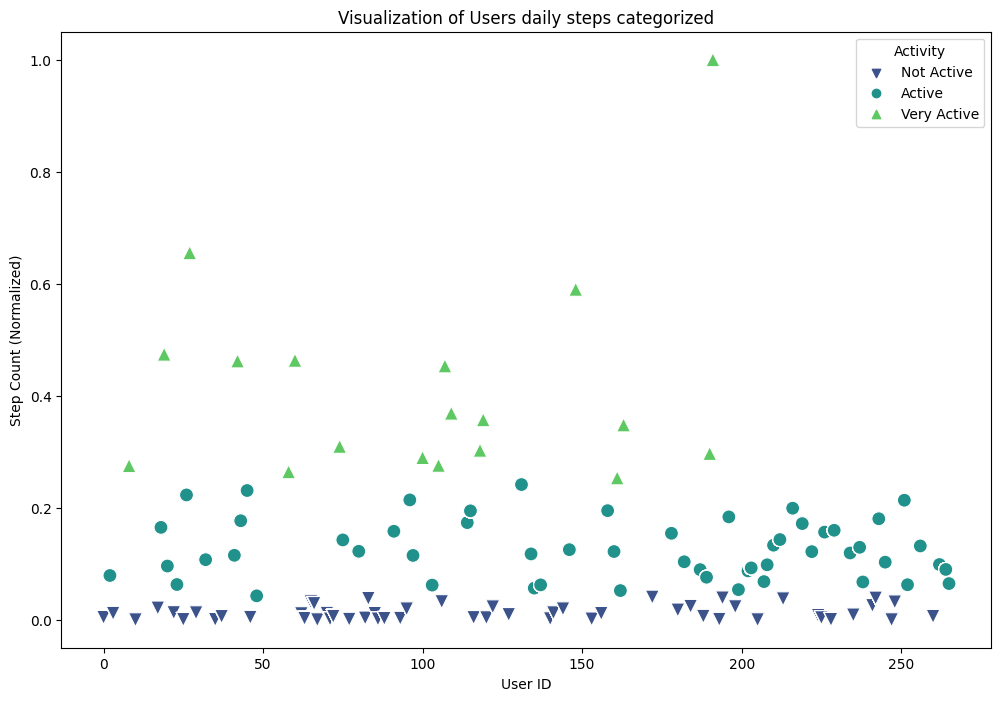

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns


mediana_passi_giornalieri = df['totale_passi_giornalieri'].median() / df['totale_passi_giornalieri'].max()

df['totale_passi_normalized'] = df['totale_passi_giornalieri'] / df['totale_passi_giornalieri'].max()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='userid', y='totale_passi_normalized', hue='stato_utente', style='stato_utente', markers={'Active': 'o', 'Not Active': 'v', 'Very Active': '^'}, data=df, palette='viridis', s=100)

plt.title('Visualization of Users daily steps categorized')
plt.xlabel('User ID')
plt.ylabel('Step Count (Normalized)')
plt.legend(title='Activity', loc='upper right')

plt.show()

In [145]:
print("VERY ACTIVE")
print(df[df['stato_utente']=="Very Active"]['totale_passi_giornalieri'].describe())

print("ACTIVE")
print(df[df['stato_utente']=="Active"]['totale_passi_giornalieri'].describe())

print("NOT ACTIVE")
print(df[df['stato_utente']=="Not Active"]['totale_passi_giornalieri'].describe())


VERY ACTIVE
count      7280.000000
mean      84607.694368
std       37927.714441
min       51868.000000
25%       59277.000000
50%       71230.000000
75%       94837.000000
max      204769.000000
Name: totale_passi_giornalieri, dtype: float64
ACTIVE
count    12245.000000
mean     27323.960229
std      10367.922747
min       8736.000000
25%      19639.000000
50%      25619.000000
75%      35509.000000
max      49429.000000
Name: totale_passi_giornalieri, dtype: float64
NOT ACTIVE
count    3062.000000
mean     4509.686806
std      2490.264176
min         7.000000
25%      2331.750000
50%      4744.000000
75%      6592.000000
max      8279.000000
Name: totale_passi_giornalieri, dtype: float64


In [122]:
file
df_steps = file.copy()
df_steps = df_steps.drop("day", axis=1)
df_steps

,userid,rounded_timestamp,step_count
0,0,2020-11-14 08:30:00,39
1,0,2020-11-14 12:00:00,148
2,0,2020-11-15 09:30:00,5
3,0,2020-11-17 12:00:00,81
4,0,2020-11-17 16:30:00,13
...,...,...,...
22582,265,2020-11-23 20:30:00,177
22583,265,2020-11-24 15:30:00,15
22584,265,2020-11-24 16:30:00,30
22585,265,2020-11-24 19:00:00,142


In [123]:
df_sport_sessions = pd.read_csv("/home/chemo/Scaricati/DATA/sport_activities_last.csv")
df_sport_sessions = df_sport_sessions.drop("DD_not", axis=1)
df_sport_sessions = df_sport_sessions.drop("Unnamed: 0", axis=1)
df_sport_sessions.rename(columns={"id": "userid"}, inplace=True)
df_sport_sessions


,userid,start_time,end_time,sport recoded
0,0,2020-11-14 10:30:00,2020-11-14 14:00:00,Walking
1,0,2020-11-15 10:00:00,2020-11-15 13:30:00,Walking
2,0,2020-11-19 10:00:00,2020-11-19 11:00:00,Outdoor activities
3,0,2020-11-21 13:00:00,2020-11-21 13:30:00,Walking
4,0,2020-11-26 16:00:00,2020-11-26 17:30:00,Walking
...,...,...,...,...
1028,265,2020-11-19 11:30:00,2020-11-19 18:30:00,Walking
1029,265,2020-11-20 17:00:00,2020-11-20 17:30:00,Walking
1030,265,2020-11-21 16:30:00,2020-11-21 18:30:00,Walking
1031,265,2020-11-22 15:30:00,2020-11-22 17:30:00,Walking


In [124]:
df_sport_sessions

,userid,start_time,end_time,sport recoded
0,0,2020-11-14 10:30:00,2020-11-14 14:00:00,Walking
1,0,2020-11-15 10:00:00,2020-11-15 13:30:00,Walking
2,0,2020-11-19 10:00:00,2020-11-19 11:00:00,Outdoor activities
3,0,2020-11-21 13:00:00,2020-11-21 13:30:00,Walking
4,0,2020-11-26 16:00:00,2020-11-26 17:30:00,Walking
...,...,...,...,...
1028,265,2020-11-19 11:30:00,2020-11-19 18:30:00,Walking
1029,265,2020-11-20 17:00:00,2020-11-20 17:30:00,Walking
1030,265,2020-11-21 16:30:00,2020-11-21 18:30:00,Walking
1031,265,2020-11-22 15:30:00,2020-11-22 17:30:00,Walking


In [125]:
import pandas as pd

df_sport_sessions['start_time'] = pd.to_datetime(df_sport_sessions['start_time'])
df_sport_sessions['end_time'] = pd.to_datetime(df_sport_sessions['end_time'])
df_steps['rounded_timestamp'] = pd.to_datetime(df_steps['rounded_timestamp'])

# Merge the two datasets based on 'userid' and 'rounded_timestamp'
merged_df = pd.merge_asof(
    df_steps.sort_values('rounded_timestamp'),
    df_sport_sessions.sort_values('start_time'),
    by='userid',
    left_on='rounded_timestamp',
    right_on='start_time',
)

# Filter steps within each sport session
steps_in_session = merged_df[
    (merged_df['rounded_timestamp'] >= merged_df['start_time']) &
    (merged_df['rounded_timestamp'] <= merged_df['end_time'])
]

# Calculate the total steps for each sport session
total_steps_per_session = steps_in_session.groupby(['userid', 'start_time', 'end_time', 'sport recoded'])['step_count'].sum().reset_index()

# Merge the total steps back to the original sport sessions dataset
final_df = pd.merge(df_sport_sessions, total_steps_per_session, on=['userid', 'start_time', 'end_time', 'sport recoded'], how='left')

# Fill NaN values with 0 (for sport sessions with no steps)
final_df['step_count'] = final_df['step_count'].fillna(0)

# Display the final DataFrame
print(final_df)



      userid          start_time            end_time           sport recoded  \
0          0 2020-11-14 10:30:00 2020-11-14 14:00:00                 Walking   
1          0 2020-11-15 10:00:00 2020-11-15 13:30:00                 Walking   
2          0 2020-11-19 10:00:00 2020-11-19 11:00:00      Outdoor activities   
3          0 2020-11-21 13:00:00 2020-11-21 13:30:00                 Walking   
4          0 2020-11-26 16:00:00 2020-11-26 17:30:00                 Walking   
...      ...                 ...                 ...                     ...   
1028     265 2020-11-19 11:30:00 2020-11-19 18:30:00                 Walking   
1029     265 2020-11-20 17:00:00 2020-11-20 17:30:00                 Walking   
1030     265 2020-11-21 16:30:00 2020-11-21 18:30:00                 Walking   
1031     265 2020-11-22 15:30:00 2020-11-22 17:30:00                 Walking   
1032     266 2020-11-17 08:30:00 2020-11-17 09:00:00  Gymnastics and fitness   

      step_count  
0          148.0  
1

In [126]:
final_df

,userid,start_time,end_time,sport recoded,step_count
0,0,2020-11-14 10:30:00,2020-11-14 14:00:00,Walking,148.0
1,0,2020-11-15 10:00:00,2020-11-15 13:30:00,Walking,0.0
2,0,2020-11-19 10:00:00,2020-11-19 11:00:00,Outdoor activities,0.0
3,0,2020-11-21 13:00:00,2020-11-21 13:30:00,Walking,0.0
4,0,2020-11-26 16:00:00,2020-11-26 17:30:00,Walking,0.0
...,...,...,...,...,...
1028,265,2020-11-19 11:30:00,2020-11-19 18:30:00,Walking,890.0
1029,265,2020-11-20 17:00:00,2020-11-20 17:30:00,Walking,0.0
1030,265,2020-11-21 16:30:00,2020-11-21 18:30:00,Walking,44.0
1031,265,2020-11-22 15:30:00,2020-11-22 17:30:00,Walking,0.0


In [127]:
final_df.to_csv("/home/chemo/Scaricati/DATA/sessions_with_steps.csv")